<h2>This script is for internal developer testing.</h2>

This is different from the unit tests located in the `tests` directory.

In [1]:
import wfdb

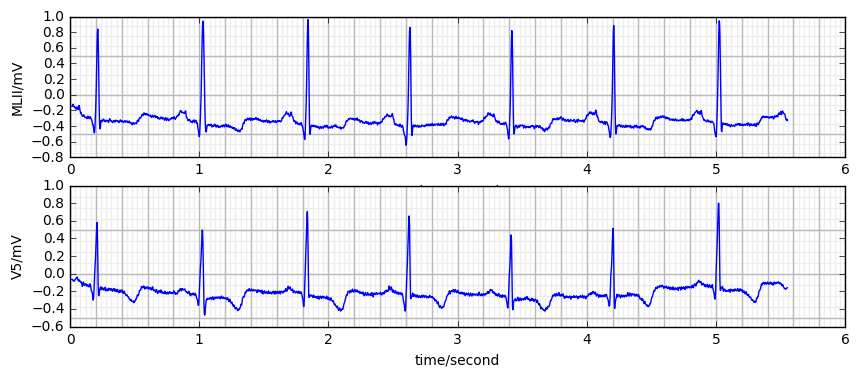

In [1]:
import wfdb
rec = wfdb.rdsamp('sampledata/100',  sampto=2000)
wfdb.plotrec(rec,timeunits='seconds', ecggrids='all', figsize = (10, 4))

In [2]:
def stuff(a):
    a[0]=100

x = [1,2,3]

stuff(x[:])

print(x)

[1, 2, 3]


In [3]:
import numpy as np
x = np.zeros([10,3])
x=x[:-3,:]
x

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [23]:
x[1:6,0]
y=np.array([1,2,3])
print(x)
print(y)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[1 2 3]


In [14]:
sampsperframe = [1,2,1]
ch=0

In [15]:
sum(([0] + sampsperframe)[:ch + 1])

0

In [6]:
([0] + sampsperframe)

[0, 1, 2, 1]

In [16]:
sum((sampsperframe)[:ch+1])

1

In [24]:
l = []

for i in range(2,5):
    a = np.zeros(i)
    
    l.append(a)
    
print(l)

[array([ 0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.])]


In [25]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [28]:
x=[1,2,3,4,5]
x[2,3] = 9
x

TypeError: list indices must be integers or slices, not tuple